In [1]:
from vllm import LLM

llm = LLM(
    model='Qwen/Qwen3-VL-Embedding-2B',
    runner='pooling',
    max_model_len=4096,
    gpu_memory_utilization=0.85,  # Reduce from 0.9 to 0.85 (19.6 GB)
    quantization="mxfp4"
)

INFO 01-21 00:40:19 [utils.py:263] non-default args: {'runner': 'pooling', 'max_model_len': 4096, 'gpu_memory_utilization': 0.85, 'disable_log_stats': True, 'quantization': 'mxfp4', 'model': 'Qwen/Qwen3-VL-Embedding-2B'}
INFO 01-21 00:40:21 [model.py:859] Resolved `--convert auto` to `--convert embed`. Pass the value explicitly to silence this message.
INFO 01-21 00:40:21 [model.py:530] Resolved architecture: Qwen3VLForConditionalGeneration
INFO 01-21 00:40:21 [model.py:1545] Using max model len 4096
INFO 01-21 00:40:21 [model.py:859] Resolved `--convert auto` to `--convert embed`. Pass the value explicitly to silence this message.
INFO 01-21 00:40:21 [model.py:530] Resolved architecture: Qwen3VLForConditionalGeneration
INFO 01-21 00:40:21 [model.py:1545] Using max model len 4096
INFO 01-21 00:40:21 [scheduler.py:229] Chunked prefill is enabled with max_num_batched_tokens=8192.
INFO 01-21 00:40:21 [scheduler.py:229] Chunked prefill is enabled with max_num_batched_tokens=8192.
INFO 01-2

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


(EngineCore_DP0 pid=356836) INFO 01-21 00:40:42 [default_loader.py:291] Loading weights took 1.10 seconds
INFO 01-21 00:40:42 [default_loader.py:291] Loading weights took 1.10 seconds
(EngineCore_DP0 pid=356836) INFO 01-21 00:40:43 [gpu_model_runner.py:3905] Model loading took 4.31 GiB memory and 2.792486 seconds
(EngineCore_DP0 pid=356836) INFO 01-21 00:40:43 [gpu_model_runner.py:3905] Model loading took 4.31 GiB memory and 2.792486 seconds
(EngineCore_DP0 pid=356836) INFO 01-21 00:40:43 [gpu_model_runner.py:4715] Encoder cache will be initialized with a budget of 8192 tokens, and profiled with 2 video items of the maximum feature size.
(EngineCore_DP0 pid=356836) INFO 01-21 00:40:43 [gpu_model_runner.py:4715] Encoder cache will be initialized with a budget of 8192 tokens, and profiled with 2 video items of the maximum feature size.
(EngineCore_DP0 pid=356836) INFO 01-21 00:40:59 [backends.py:644] Using cache directory: /home/administrator/.cache/vllm/torch_compile_cache/b239d35871/ra

Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 51/51 [00:01<00:00, 25.90it/s]
Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 51/51 [00:01<00:00, 25.90it/s]


(EngineCore_DP0 pid=356836) INFO 01-21 00:41:10 [gpu_model_runner.py:4856] Graph capturing finished in 3 secs, took 0.32 GiB
INFO 01-21 00:41:10 [gpu_model_runner.py:4856] Graph capturing finished in 3 secs, took 0.32 GiB
(EngineCore_DP0 pid=356836) INFO 01-21 00:41:10 [core.py:273] init engine (profile, create kv cache, warmup model) took 27.03 seconds
(EngineCore_DP0 pid=356836) INFO 01-21 00:41:10 [core.py:273] init engine (profile, create kv cache, warmup model) took 27.03 seconds
INFO 01-21 00:41:11 [llm.py:347] Supported tasks: ['embed', 'token_embed']
INFO 01-21 00:41:11 [llm.py:347] Supported tasks: ['embed', 'token_embed']


In [2]:
from e_commerce_recommendation.configs.settings import BASE_DIR
import polars as pl

file_path = f"{BASE_DIR / 'data' / 'raw_data' / 'india' / 'india.csv'}"
df = pl.read_csv(file_path)
df

asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
str,str,str,str,f64,i64,f64,f64,str,bool,i64
"""B08VJFZQ9S""","""प्लेन कैज़ुअल वियर बेसबॉल कैप …","""https://m.media-amazon.com/ima…","""https://www.amazon.in/dp/B08VJ…",0.0,0,299.0,499.0,"""पुरुषों के हैट्स और कैप्स""",false,0
"""B08VJFYW5Q""","""यूनीसेक्स कॉटन एडजस्टेबल बेसबॉ…","""https://m.media-amazon.com/ima…","""https://www.amazon.in/dp/B08VJ…",0.0,0,299.0,499.0,"""पुरुषों के हैट्स और कैप्स""",false,0
"""B08VJFYVX9""","""प्लेन कैज़ुअल वियर बेसबॉल कैप …","""https://m.media-amazon.com/ima…","""https://www.amazon.in/dp/B08VJ…",0.0,0,275.0,300.0,"""पुरुषों के हैट्स और कैप्स""",false,0
"""B08VJFXM7F""","""यूनीसेक्स कॉटन एडजस्टेबल बेसबॉ…","""https://m.media-amazon.com/ima…","""https://www.amazon.in/dp/B08VJ…",0.0,0,275.0,300.0,"""पुरुषों के हैट्स और कैप्स""",false,0
"""B08VJFXFTJ""","""यूनीसेक्स कॉटन एडजस्टेबल बेसबॉ…","""https://m.media-amazon.com/ima…","""https://www.amazon.in/dp/B08VJ…",0.0,0,275.0,300.0,"""पुरुषों के हैट्स और कैप्स""",false,0
…,…,…,…,…,…,…,…,…,…,…
"""B0CDPWMMCY""","""Pinakine® कंप्यूटर मॉनिटर लाइट…","""https://m.media-amazon.com/ima…","""https://www.amazon.in/dp/B0CDP…",0.0,0,0.0,0.0,"""मॉनीटर""",false,0
"""B0CDLBKWHH""","""डैश ग्लास माउंटेड मॉनिटर पर 5 …","""https://m.media-amazon.com/ima…","""https://www.amazon.in/dp/B0CDL…",0.0,0,15999.0,0.0,"""मॉनीटर""",false,0
"""B0CD85QNS2""","""WOMBLE मॉनिटर डस्ट कवर पु लेदर…","""https://m.media-amazon.com/ima…","""https://www.amazon.in/dp/B0CD8…",0.0,0,2364.0,0.0,"""मॉनीटर""",false,0


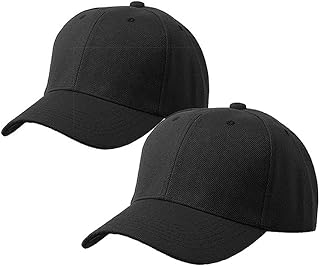

In [14]:
from PIL import Image, ImageFile

sample_image_path = BASE_DIR / f"data/raw_data/india/images/{df['asin'][0]}.jpg"
image = Image.open(sample_image_path)
display(image)

In [15]:
sample_image_paths = [BASE_DIR / f"data/raw_data/india/images/{asin}.jpg" for asin in df['asin'][:5]]
images = [Image.open(path) for path in sample_image_paths]

In [16]:
def generate_image_embedding(image: Image.Image, llm: LLM):
    conversation = [
        {"role": "system", "content": "You are a helpful assistant that generates image embeddings."},
        {"type": "image", "image": image}
    ]
    vllm_input = llm.llm_engine.tokenizer.apply_chat_template(
        conversation,
        tokenize=False,
        add_generation_prompt=True
    )
    output = llm.embed([vllm_input])
    return output[0].outputs.embedding

def generate_batch_image_embeddings(images: list[Image.Image], llm: LLM):
    """Generate embeddings for multiple images in a single batch."""
    vllm_inputs = []
    for image in images:
        conversation = [
            {"role": "system", "content": "You are a helpful assistant that generates image embeddings."},
            {"type": "image", "image": image}
        ]
        vllm_input = llm.llm_engine.tokenizer.apply_chat_template(
            conversation,
            tokenize=False,
            add_generation_prompt=True
        )
        vllm_inputs.append(vllm_input)
    
    # Process all images in a single batch
    outputs = llm.embed(vllm_inputs)
    return [output.outputs.embedding for output in outputs]

# Test with single image
# embedding = generate_image_embedding(image, llm)
# print(f"Single embedding shape: {len(embedding)}")

# Test with batch of images
embeddings = generate_batch_image_embeddings(images, llm)
for i, emb in enumerate(embeddings):
    print(f"Embedding {i} shape: {len(emb)}")

Adding requests:   0%|          | 0/5 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/5 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Embedding 0 shape: 2048
Embedding 1 shape: 2048
Embedding 2 shape: 2048
Embedding 3 shape: 2048
Embedding 4 shape: 2048


In [18]:
embeddings[0]

[-0.01731877028942108,
 -0.03191493824124336,
 -0.013537379913032055,
 -0.02299085631966591,
 -5.169870564714074e-05,
 0.0037057632580399513,
 -0.05021687224507332,
 0.014823053032159805,
 -0.00025878893211483955,
 0.019360721111297607,
 0.02888982743024826,
 -0.03070489503443241,
 0.007638409733772278,
 -0.02631848119199276,
 0.020873278379440308,
 0.02541094832122326,
 0.037360142916440964,
 0.03100740537047386,
 0.09559356421232224,
 -8.862635149853304e-05,
 -0.05626709759235382,
 0.06019974499940872,
 0.03615009784698486,
 -0.07472028583288193,
 -0.042049068957567215,
 -0.010814778506755829,
 -0.021024534478783607,
 -0.00752496812492609,
 0.04809929430484772,
 -0.06957759708166122,
 0.005180505570024252,
 -0.040839023888111115,
 0.01262984611093998,
 -0.0009406210156157613,
 0.014747424982488155,
 -0.0010351557284593582,
 0.02616722509264946,
 -0.00873501319438219,
 -0.00873501319438219,
 0.00597459776327014,
 -0.003422158770263195,
 0.07078763842582703,
 0.006466178689152002,
 0.0